# Running FreeFem++ inside a Notebook

<div align="right"> <a href="mailto:pascal.lafon@utt.fr">Pascal Lafon</a> - Novembre 2020 </div>

----
### Passing parameters to `FreeFem++` from the command line :
* This notebook presents basic concept to pass parameters from command line to `FreeFem++`.
* To use this notebook, you will need to have :
    * `FreeFem++` installed on your machine
    * The file `getARV.idp`, which define the function `getARV` in the same folder as this notebook file.
    * The file `cantilver-2D.edp`, the model of the cantilever beam.
    * You must also check that can run `FreeFem++` using the command line `FreeFem++ cantilver-2D.edp`.
----

### Display the model file in the notebook :

The code below load the model file `cantilever-2D.edp` in read only mode and print it :

In [57]:
file = open('cantilever-2D.edp', 'r')
file_content = file.read()
print(file_content)

//
// Example of a rectangular cantilever model in FreeFem ++
// From :
//
// R. Font et F. Periago, « The Finite Element Method with FreeFem++ for beginners », vol. 7, nᵒ 4, p. 20.
//
// and modify to read parameters from the command line to define the shape of the cantilever beam.
//
//
// (c) pascal.lafon@utt.fr  / November 2020.


// include the getARGV function to read values of arguments specified on command line
include "getARGV.idp";

// Get the value from -l value1 -h value2 -r value3
// Here 100, 20 and 6 are default values.
// l,h,r are variables intialized with values read from getARGV.
real l=getARGV("l",100);
real h=getARGV("h",20);
real r=getARGV("r",6);


// Domain and mesh (dimension in mm)
// l,h,and r are used to define the geometry of meshed domain.
border Lower(t=0,l){x=t;y=-h/2;label=1;}; //Lower side
border Right(t=-h/2, h/2){x=l;y=t;label=2;}; //Right side
border Upper(t=0,l){x=l-t;y=h/2;label=3;}; //Upper side
border Leftt=-h/2,h/2){x=0;y=-t;label=4;}; //Left s

### Running `FreeFem+` :

The code below use the `!` to run a command shell from a code cell. Here the command to launch `FreeFem++`, here is the same command as the one you use on commmand line.
In this exemple, we specify some options to run `FreeFem++` :
* `-nw`, no windows display
* `-v 0`, minimal information display on output

In [61]:
!FreeFem++ -nw -v 0 cantilever-2D.edp l 400 h 20 r 6

 kk 2 6 : 
Max von Mises Stress 133.153
Max displacement 3.10105
Area             7887.37


### Display results in the notebook :

The code below display in the notebook of the image files `cantilever-2D??.eps`, created at the end of simulation (but it does not work on Windows 10 plateform).

On windows 10 you need to convert `.eps` in `.png` or `.svg` or `.pdf` with one of the following solution :
* [Inkscape](https://inkscape.org) free open source software to design easily vectorized graphics (like Adobe Illustrator, which can convert `.eps` in `.svg`(preferred) or `.pdf` or `.png'.
* [dvisvmg](https://dvisvgm.de) free open source commnand line software to convet `.eps` into `.svg`.
* Adobe Acrobat Reader : to convert `.eps` in `.pdf` (right click with mouse button on the file to converted, and convert to pdf command menu).

You can also run `FreeFem++` without the `-nw` option and the plots will be display in a specific windows by `ffglut` (included in the FreeFem distribution).

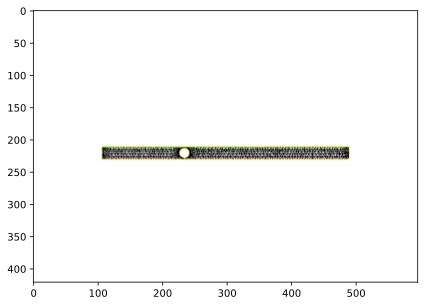

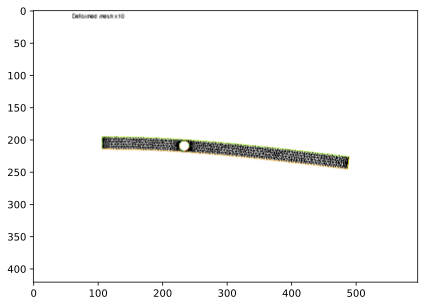

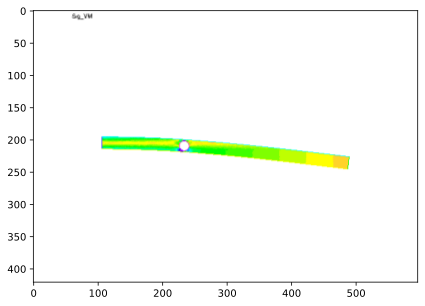

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 'magic command' to modify the output format of the image 'svg' -> vectorized format (better quality)
%config InlineBackend.figure_format = 'svg'
# Read the image file :
img1 = mpimg.imread('cantilever-2D-mesh.eps')
img2 = mpimg.imread('cantilever-2D-meshdef.eps')
img3 = mpimg.imread('cantilever-2D-sigvm.eps')
# Create a figure (to specify the size)
plt.figure(figsize=(15,5))
# Display the image :
plt.imshow(img1,interpolation='antialiased')
plt.figure(figsize=(15,5))
plt.imshow(img2,interpolation='antialiased')
plt.figure(figsize=(15,5))
plt.imshow(img3,interpolation='antialiased')

### Next step : [Bi directional communication to  FreeFem++](https://github.com/PasLafon/MP06-FreeFem-in-Notebook/blob/master/FreeFem_in_notebook_03.ipynb)